In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('current.csv')

# Clean the DataFrame by removing the row with transformation codes
df_cleaned = df.drop(index=0)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned['sasdate'] = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')
df_cleaned

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-01-01,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9665,23.3891,22.2688,31.7011,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1,1959-02-01,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3966,23.7048,22.4617,31.9337,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
2,1959-03-01,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7193,23.8483,22.5719,31.9337,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
3,1959-04-01,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.2032,24.1927,22.9026,32.4374,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
4,1959-05-01,2642.720,2486.4,15.622,2.853072e+05,18679.66354,23.5528,24.3936,23.1231,32.5925,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2023-09-01,19111.748,15741.9,116.594,1.507530e+06,705304.00000,103.2096,101.0935,101.3665,102.1034,...,120.395,123.976,29.90,34.55,26.62,67.9,508808.61,913938.95,5074.6108,15.0424
777,2023-10-01,19145.402,15784.6,116.663,1.505477e+06,703528.00000,102.3722,100.5292,100.5527,101.1664,...,120.040,124.228,29.97,34.67,26.65,63.8,513229.64,918210.64,5015.5456,19.0462
778,2023-11-01,19213.108,15859.9,117.127,1.514733e+06,703336.00000,102.6710,100.9362,101.2159,101.8557,...,119.325,124.551,30.26,34.96,26.89,61.3,517434.30,922552.40,4999.7208,13.8563
779,2023-12-01,19251.946,15899.0,117.773,1.530296e+06,706180.00000,102.6715,100.8332,101.2843,101.9884,...,119.193,124.917,30.45,35.01,27.14,69.7,522366.13,928336.14,5077.4222,12.6960


In [2]:
# Extract transformation codes
transformation_codes = df.iloc[0, 1:].to_frame().reset_index()
transformation_codes.columns = ['Series', 'Transformation_Code']

In [3]:
import numpy as np

# Function to apply transformations based on the transformation code
def apply_transformation(series, code):
    if code == 1:
        # No transformation
        return series
    elif code == 2:
        # First difference
        return series.diff()
    elif code == 3:
        # Second difference
        return series.diff().diff()
    elif code == 4:
        # Log
        return np.log(series)
    elif code == 5:
        # First difference of log
        return np.log(series).diff()
    elif code == 6:
        # Second difference of log
        return np.log(series).diff().diff()
    elif code == 7:
        # Delta (x_t/x_{t-1} - 1)
        return series.pct_change()
    else:
        raise ValueError("Invalid transformation code")

# Applying the transformations to each column in df_cleaned based on transformation_codes
for series_name, code in transformation_codes.values:
    df_cleaned[series_name] = apply_transformation(df_cleaned[series_name].astype(float), float(code))


df_cleaned = df_cleaned[2:]
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-03-01,0.006457,0.007325,0.009404,-0.003374,0.008321,0.014306,0.006035,0.004894,0.000000,...,-0.001148,0.000292,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1,1959-04-01,0.006510,0.007029,-0.003622,0.019915,0.000616,0.021075,0.014338,0.014545,0.015650,...,0.001312,0.001760,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
2,1959-05-01,0.005796,0.006618,0.012043,0.006839,0.007803,0.014955,0.008270,0.009582,0.004770,...,-0.001695,-0.001867,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN
3,1959-06-01,0.003068,0.003012,0.003642,-0.000097,0.009064,0.001141,0.007034,0.007128,-0.004767,...,0.003334,0.001946,-0.004619,0.003992,0.004796,NaN,0.009726,0.009007,-0.012252,NaN
4,1959-07-01,-0.000580,-0.000762,-0.003386,0.012155,-0.000330,-0.024240,0.001168,0.008249,0.013054,...,-0.001204,-0.000013,0.000000,-0.004040,-0.004796,NaN,-0.004631,-0.001000,0.029341,NaN


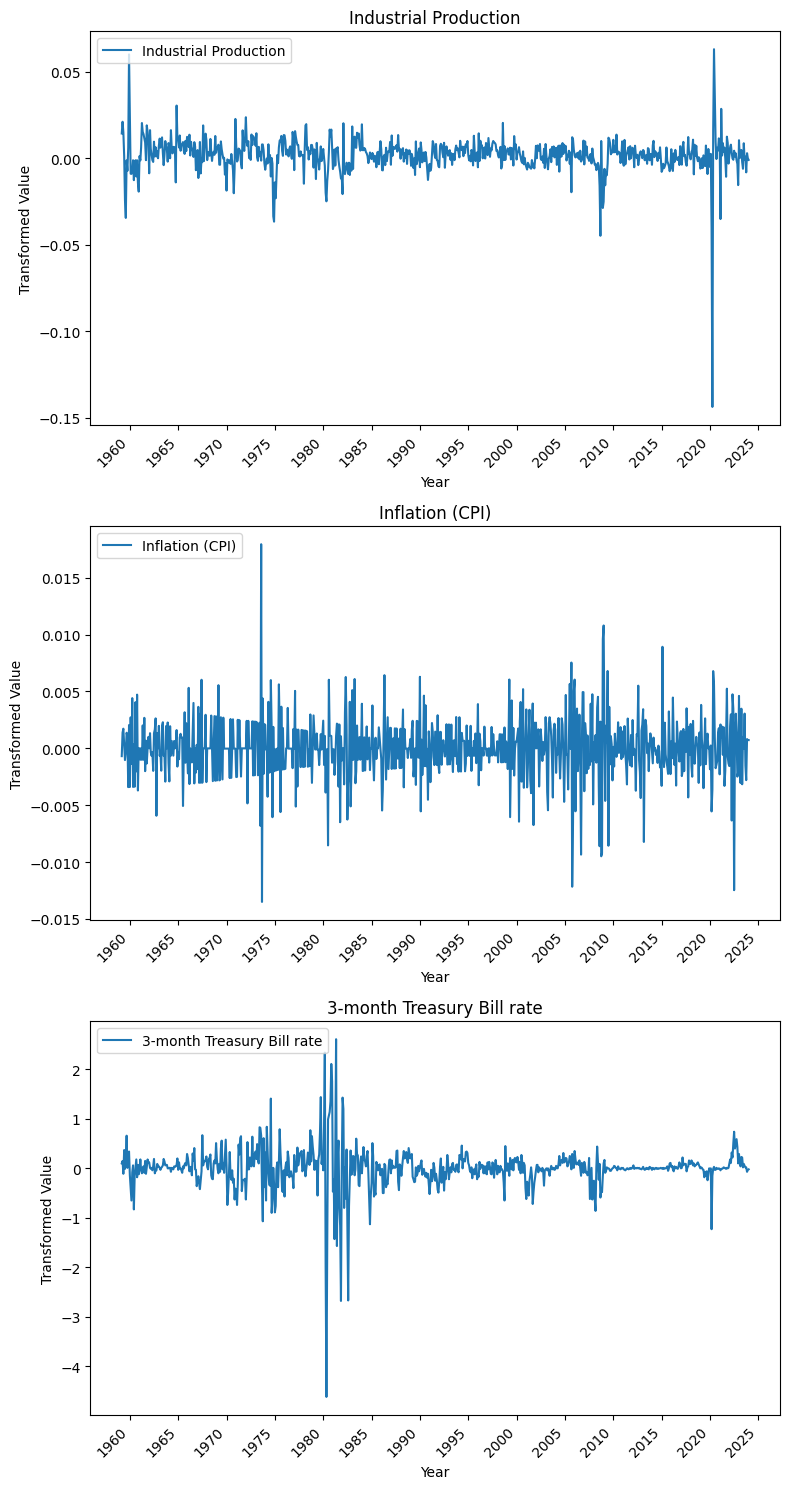

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

series_to_plot = ['INDPRO', 'CPIAUCSL', 'TB3MS']
series_names = ['Industrial Production',
                'Inflation (CPI)',
                '3-month Treasury Bill rate']


# Create a figure and a grid of subplots
fig, axs = plt.subplots(len(series_to_plot), 1, figsize=(8, 15))

# Iterate over the selected series and plot each one
for ax, series_name, plot_title in zip(axs, series_to_plot, series_names):
    if series_name in df_cleaned.columns:
        dates = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')
        ax.plot(dates, df_cleaned[series_name], label=plot_title)
        ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.set_title(plot_title)
        ax.set_xlabel('Year')
        ax.set_ylabel('Transformed Value')
        ax.legend(loc='upper left')
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    else:
        ax.set_visible(False)  # Hide plots for which the data is not available

plt.tight_layout()
plt.show()

In [5]:
Yraw = df_cleaned['INDPRO']
Xraw = df_cleaned[['CPIAUCSL', 'TB3MS']]

num_lags  = 4  ## this is p
num_leads = 1  ## this is h
X = pd.DataFrame()
## Add the lagged values of Y
col = 'INDPRO'
for lag in range(0,num_lags+1):
        # Shift each column in the DataFrame and name it with a lag suffix
        X[f'{col}_lag{lag}'] = Yraw.shift(lag)

for col in Xraw.columns:
    for lag in range(0,num_lags+1):
        # Shift each column in the DataFrame and name it with a lag suffix
        X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)
## Add a column on ones (for the intercept)
X.insert(0, 'Ones', np.ones(len(X)))


## X is now a DataFrame
X.head()

,Ones,INDPRO_lag0,INDPRO_lag1,INDPRO_lag2,INDPRO_lag3,INDPRO_lag4,CPIAUCSL_lag0,CPIAUCSL_lag1,CPIAUCSL_lag2,CPIAUCSL_lag3,CPIAUCSL_lag4,TB3MS_lag0,TB3MS_lag1,TB3MS_lag2,TB3MS_lag3,TB3MS_lag4
0,1.0,0.014306,NaN,NaN,NaN,NaN,-0.000690,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,NaN
1,1.0,0.021075,0.014306,NaN,NaN,NaN,0.001380,-0.000690,NaN,NaN,NaN,0.15,0.10,NaN,NaN,NaN
2,1.0,0.014955,0.021075,0.014306,NaN,NaN,0.001723,0.001380,-0.000690,NaN,NaN,-0.11,0.15,0.10,NaN,NaN
3,1.0,0.001141,0.014955,0.021075,0.014306,NaN,0.000339,0.001723,0.001380,-0.00069,NaN,0.37,-0.11,0.15,0.10,NaN
4,1.0,-0.024240,0.001141,0.014955,0.021075,0.014306,-0.001034,0.000339,0.001723,0.00138,-0.00069,-0.01,0.37,-0.11,0.15,0.1


In [6]:
y = Yraw.shift(-num_leads)
y

0      0.021075
1      0.014955
2      0.001141
3     -0.024240
4     -0.034465
         ...   
774   -0.008147
775    0.002915
776    0.000005
777   -0.000951
778         NaN
Name: INDPRO, Length: 779, dtype: float64

In [7]:
## Save last row of X (converted to numpy)
X_T = X.iloc[-1:].values
## Subset getting only rows of X and y from p+1 to h-1
## and convert to numpy array
y = y.iloc[num_lags:-num_leads].values
X = X.iloc[num_lags:-num_leads].values

In [8]:
X_T

array([[ 1.00000000e+00, -9.51056709e-04,  4.86991246e-06,
         2.91450984e-03, -8.14668061e-03,  9.25729878e-04,
         7.21400503e-04,  7.26467817e-04,  8.11330254e-04,
        -2.79891559e-03, -1.51527417e-03, -2.00000000e-02,
        -3.00000000e-02, -7.00000000e-02,  2.00000000e-02,
         2.00000000e-02]])

In [9]:
from numpy.linalg import solve
# Solving for the OLS estimator beta: (X'X)^{-1} X'Y
beta_ols = solve(X.T @ X, X.T @ y)

## Produce the One step ahead forecast
## % change month-to-month INDPRO
forecast = X_T@beta_ols*100
forecast

array([0.08445815])

In [10]:
def calculate_forecast(df_cleaned, p = 4, H = [1,4,8], end_date = '12/1/1999',target = 'INDPRO', xvars = ['CPIAUCSL', 'TB3MS']):

    ## Subset df_cleaned to use only data up to end_date
    rt_df = df_cleaned[df_cleaned['sasdate'] <= pd.Timestamp(end_date)]
    ## Get the actual values of target at different steps ahead
    Y_actual = []
    for h in H:
        os = pd.Timestamp(end_date) + pd.DateOffset(months=h)
        Y_actual.append(df_cleaned[df_cleaned['sasdate'] == os][target]*100)
        ## Now Y contains the true values at T+H (multiplying * 100)

    Yraw = rt_df[target]
    Xraw = rt_df[xvars]

    X = pd.DataFrame()
    ## Add the lagged values of Y
    for lag in range(0,p):
        # Shift each column in the DataFrame and name it with a lag suffix
        X[f'{target}_lag{lag}'] = Yraw.shift(lag)

    for col in Xraw.columns:
        for lag in range(0,p):
            X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)
    
    ## Add a column on ones (for the intercept)
    X.insert(0, 'Ones', np.ones(len(X)))
    
    ## Save last row of X (converted to numpy)
    X_T = X.iloc[-1:].values

    ## While the X will be the same, Y needs to be leaded differently
    Yhat = []
    for h in H:
        y_h = Yraw.shift(-h)
        ## Subset getting only rows of X and y from p+1 to h-1
        y = y_h.iloc[p:-h].values
        X_ = X.iloc[p:-h].values
        # Solving for the OLS estimator beta: (X'X)^{-1} X'Y
        beta_ols = solve(X_.T @ X_, X_.T @ y)
        ## Produce the One step ahead forecast
        ## % change month-to-month INDPRO
        Yhat.append(X_T@beta_ols*100)

    ## Now calculate the forecasting error and return

    return np.array(Y_actual) - np.array(Yhat)

In [11]:
t0 = pd.Timestamp('12/1/1999')
e = []
T = []
for j in range(0, 10):
    t0 = t0 + pd.DateOffset(months=1)
    print(f'Using data up to {t0}')
    ehat = calculate_forecast(df_cleaned, p = 4, H = [1,4,8], end_date = t0)
    e.append(ehat.flatten())
    T.append(t0)

## Create a pandas DataFrame from the list
edf = pd.DataFrame(e)
## Calculate the RMSFE, that is, the square root of the MSFE
np.sqrt(edf.apply(np.square).mean())

Using data up to 2000-01-01 00:00:00
Using data up to 2000-02-01 00:00:00
Using data up to 2000-03-01 00:00:00


Using data up to 2000-04-01 00:00:00
Using data up to 2000-05-01 00:00:00
Using data up to 2000-06-01 00:00:00
Using data up to 2000-07-01 00:00:00
Using data up to 2000-08-01 00:00:00
Using data up to 2000-09-01 00:00:00
Using data up to 2000-10-01 00:00:00


0    0.337110
1    0.512690
2    0.624035
dtype: float64

In [12]:
def calculate_forecast(df_cleaned, p = 4, H = [1,4,8], end_date = '12/1/1999',target = 'CPIAUCSL', xvars = ['INDPRO', 'TB3MS']):

    ## Subset df_cleaned to use only data up to end_date
    rt_df = df_cleaned[df_cleaned['sasdate'] <= pd.Timestamp(end_date)]
    ## Get the actual values of target at different steps ahead
    Y_actual = []
    for h in H:
        os = pd.Timestamp(end_date) + pd.DateOffset(months=h)
        Y_actual.append(df_cleaned[df_cleaned['sasdate'] == os][target]*100)
        ## Now Y contains the true values at T+H (multiplying * 100)

    Yraw = rt_df[target]
    Xraw = rt_df[xvars]

    X = pd.DataFrame()
    ## Add the lagged values of Y
    for lag in range(0,p):
        # Shift each column in the DataFrame and name it with a lag suffix
        X[f'{target}_lag{lag}'] = Yraw.shift(lag)

    for col in Xraw.columns:
        for lag in range(0,p):
            X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)
    
    ## Add a column on ones (for the intercept)
    X.insert(0, 'Ones', np.ones(len(X)))
    
    ## Save last row of X (converted to numpy)
    X_T = X.iloc[-1:].values

    ## While the X will be the same, Y needs to be leaded differently
    Yhat = []
    for h in H:
        y_h = Yraw.shift(-h)
        ## Subset getting only rows of X and y from p+1 to h-1
        y = y_h.iloc[p:-h].values
        X_ = X.iloc[p:-h].values
        # Solving for the OLS estimator beta: (X'X)^{-1} X'Y
        beta_ols = solve(X_.T @ X_, X_.T @ y)
        ## Produce the One step ahead forecast
        ## % change month-to-month INDPRO
        Yhat.append(X_T@beta_ols*100)

    ## Now calculate the forecasting error and return

    return np.array(Y_actual) - np.array(Yhat)

In [13]:
t0 = pd.Timestamp('12/1/1999')
e = []
T = []
for j in range(0, 10):
    t0 = t0 + pd.DateOffset(months=1)
    print(f'Using data up to {t0}')
    ehat = calculate_forecast(df_cleaned, p = 4, H = [1,4,8], end_date = t0)
    e.append(ehat.flatten())
    T.append(t0)

## Create a pandas DataFrame from the list
edf = pd.DataFrame(e)
## Calculate the RMSFE, that is, the square root of the MSFE
np.sqrt(edf.apply(np.square).mean())

Using data up to 2000-01-01 00:00:00
Using data up to 2000-02-01 00:00:00
Using data up to 2000-03-01 00:00:00
Using data up to 2000-04-01 00:00:00
Using data up to 2000-05-01 00:00:00
Using data up to 2000-06-01 00:00:00
Using data up to 2000-07-01 00:00:00
Using data up to 2000-08-01 00:00:00
Using data up to 2000-09-01 00:00:00
Using data up to 2000-10-01 00:00:00


0    0.282973
1    0.326073
2    0.314844
dtype: float64

In [14]:
def calculate_forecast(df_cleaned, p = 4, H = [1,4,8], end_date = '12/1/1999',target = 'TB3MS', xvars = ['CPIAUCSL', 'INDPRO']):

    ## Subset df_cleaned to use only data up to end_date
    rt_df = df_cleaned[df_cleaned['sasdate'] <= pd.Timestamp(end_date)]
    ## Get the actual values of target at different steps ahead
    Y_actual = []
    for h in H:
        os = pd.Timestamp(end_date) + pd.DateOffset(months=h)
        Y_actual.append(df_cleaned[df_cleaned['sasdate'] == os][target]*100)
        ## Now Y contains the true values at T+H (multiplying * 100)

    Yraw = rt_df[target]
    Xraw = rt_df[xvars]

    X = pd.DataFrame()
    ## Add the lagged values of Y
    for lag in range(0,p):
        # Shift each column in the DataFrame and name it with a lag suffix
        X[f'{target}_lag{lag}'] = Yraw.shift(lag)

    for col in Xraw.columns:
        for lag in range(0,p):
            X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)
    
    ## Add a column on ones (for the intercept)
    X.insert(0, 'Ones', np.ones(len(X)))
    
    ## Save last row of X (converted to numpy)
    X_T = X.iloc[-1:].values

    ## While the X will be the same, Y needs to be leaded differently
    Yhat = []
    for h in H:
        y_h = Yraw.shift(-h)
        ## Subset getting only rows of X and y from p+1 to h-1
        y = y_h.iloc[p:-h].values
        X_ = X.iloc[p:-h].values
        # Solving for the OLS estimator beta: (X'X)^{-1} X'Y
        beta_ols = solve(X_.T @ X_, X_.T @ y)
        ## Produce the One step ahead forecast
        ## % change month-to-month INDPRO
        Yhat.append(X_T@beta_ols*100)

    ## Now calculate the forecasting error and return

    return np.array(Y_actual) - np.array(Yhat)

In [15]:
t0 = pd.Timestamp('12/1/1999')
e = []
T = []
for j in range(0, 10):
    t0 = t0 + pd.DateOffset(months=1)
    print(f'Using data up to {t0}')
    ehat = calculate_forecast(df_cleaned, p = 4, H = [1,4,8], end_date = t0)
    e.append(ehat.flatten())
    T.append(t0)

## Create a pandas DataFrame from the list
edf = pd.DataFrame(e)
## Calculate the RMSFE, that is, the square root of the MSFE
np.sqrt(edf.apply(np.square).mean())

Using data up to 2000-01-01 00:00:00
Using data up to 2000-02-01 00:00:00
Using data up to 2000-03-01 00:00:00
Using data up to 2000-04-01 00:00:00
Using data up to 2000-05-01 00:00:00
Using data up to 2000-06-01 00:00:00
Using data up to 2000-07-01 00:00:00
Using data up to 2000-08-01 00:00:00
Using data up to 2000-09-01 00:00:00
Using data up to 2000-10-01 00:00:00


0    18.738776
1    29.750108
2    34.836699
dtype: float64

In [69]:
Yraw = df_cleaned['INDPRO']
Xraw = df_cleaned[['CPIAUCSL', 'FEDFUNDS','UNRATE','IPCONGD','S&P 500']]

num_lags  = 10  ## this is p
num_leads = 1  ## this is h
X = pd.DataFrame()
## Add the lagged values of Y
col = 'INDPRO'
for lag in range(0,num_lags+1):
        # Shift each column in the DataFrame and name it with a lag suffix
        X[f'{col}_lag{lag}'] = Yraw.shift(lag)

for col in Xraw.columns:
    for lag in range(0,num_lags+1):
        # Shift each column in the DataFrame and name it with a lag suffix
        X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)
## Add a column on ones (for the intercept)
X.insert(0, 'Ones', np.ones(len(X)))


## X is now a DataFrame
X.head()

,Ones,INDPRO_lag0,INDPRO_lag1,INDPRO_lag2,INDPRO_lag3,INDPRO_lag4,INDPRO_lag5,INDPRO_lag6,INDPRO_lag7,INDPRO_lag8,...,S&P 500_lag1,S&P 500_lag2,S&P 500_lag3,S&P 500_lag4,S&P 500_lag5,S&P 500_lag6,S&P 500_lag7,S&P 500_lag8,S&P 500_lag9,S&P 500_lag10
0,1.0,0.014306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.021075,0.014306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.025062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.014955,0.021075,0.014306,NaN,NaN,NaN,NaN,NaN,NaN,...,0.016599,0.025062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.001141,0.014955,0.021075,0.014306,NaN,NaN,NaN,NaN,NaN,...,0.014949,0.016599,0.025062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,-0.024240,0.001141,0.014955,0.021075,0.014306,NaN,NaN,NaN,NaN,...,-0.008664,0.014949,0.016599,0.025062,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
y = Yraw.shift(-num_leads)
y

0      0.021075
1      0.014955
2      0.001141
3     -0.024240
4     -0.034465
         ...   
774   -0.008147
775    0.002915
776    0.000005
777   -0.000951
778         NaN
Name: INDPRO, Length: 779, dtype: float64

In [71]:
## Save last row of X (converted to numpy)
X_T = X.iloc[-1:].values
## Subset getting only rows of X and y from p+1 to h-1
## and convert to numpy array
y = y.iloc[num_lags:-num_leads].values
X = X.iloc[num_lags:-num_leads].values

In [72]:
X_T

array([[ 1.00000000e+00, -9.51056709e-04,  4.86991246e-06,
         2.91450984e-03, -8.14668061e-03,  9.25729878e-04,
        -7.35807029e-04,  8.66032114e-03, -6.07922381e-03,
        -2.20502120e-03,  4.78110860e-03,  8.97545843e-04,
         7.21400503e-04,  7.26467817e-04,  8.11330254e-04,
        -2.79891559e-03, -1.51527417e-03,  3.05087605e-03,
        -4.70784880e-05,  1.00257828e-03, -3.16114422e-03,
         3.48032542e-03, -3.05231938e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.10000000e-01,  4.00000000e-02,
         2.00000000e-02,  2.30000000e-01,  1.80000000e-01,
         8.00000000e-02,  0.00000000e+00,  0.00000000e+00,
        -1.00000000e-01,  0.00000000e+00,  0.00000000e+00,
         3.00000000e-01, -1.00000000e-01, -1.00000000e-01,
         3.00000000e-01, -1.00000000e-01, -1.00000000e-01,
         6.20787002e-03,  1.30197557e-03,  6.79041985e-03,
        -9.21933939e-03, -1.94613030e-03, -8.22712378e-0

In [73]:
from numpy.linalg import solve
# Solving for the OLS estimator beta: (X'X)^{-1} X'Y
beta_ols = solve(X.T @ X, X.T @ y)

## Produce the One step ahead forecast
## % change month-to-month FEDFUNDS
forecast = X_T@beta_ols*100
forecast

array([0.18356767])

In [74]:
def calculate_forecast(df_cleaned, p = 4, H = [1,4,8], end_date = '12/1/1999',target = 'INDPRO', xvars = ['CPIAUCSL', 'UNRATE','FEDFUNDS', 'IPCONGD','S&P 500']):

    ## Subset df_cleaned to use only data up to end_date
    rt_df = df_cleaned[df_cleaned['sasdate'] <= pd.Timestamp(end_date)]
    ## Get the actual values of target at different steps ahead
    Y_actual = []
    for h in H:
        os = pd.Timestamp(end_date) + pd.DateOffset(months=h)
        Y_actual.append(df_cleaned[df_cleaned['sasdate'] == os][target]*100)
        ## Now Y contains the true values at T+H (multiplying * 100)

    Yraw = rt_df[target]
    Xraw = rt_df[xvars]

    X = pd.DataFrame()
    ## Add the lagged values of Y
    for lag in range(0,p):
        # Shift each column in the DataFrame and name it with a lag suffix
        X[f'{target}_lag{lag}'] = Yraw.shift(lag)

    for col in Xraw.columns:
        for lag in range(0,p):
            X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)
    
    ## Add a column on ones (for the intercept)
    X.insert(0, 'Ones', np.ones(len(X)))
    
    ## Save last row of X (converted to numpy)
    X_T = X.iloc[-1:].values

    ## While the X will be the same, Y needs to be leaded differently
    Yhat = []
    for h in H:
        y_h = Yraw.shift(-h)
        ## Subset getting only rows of X and y from p+1 to h-1
        y = y_h.iloc[p:-h].values
        X_ = X.iloc[p:-h].values
        # Solving for the OLS estimator beta: (X'X)^{-1} X'Y
        beta_ols = solve(X_.T @ X_, X_.T @ y)
        ## Produce the One step ahead forecast
        ## % change month-to-month INDPRO
        Yhat.append(X_T@beta_ols*100)

    ## Now calculate the forecasting error and return

    return np.array(Y_actual) - np.array(Yhat)

In [75]:
t0 = pd.Timestamp('12/1/1999')
e = []
T = []
for j in range(0, 10):
    t0 = t0 + pd.DateOffset(months=1)
    print(f'Using data up to {t0}')
    ehat = calculate_forecast(df_cleaned, p = 4, H = [1,4,8], end_date = t0)
    e.append(ehat.flatten())
    T.append(t0)

## Create a pandas DataFrame from the list
edf = pd.DataFrame(e)
## Calculate the RMSFE, that is, the square root of the MSFE
np.sqrt(edf.apply(np.square).mean())

Using data up to 2000-01-01 00:00:00
Using data up to 2000-02-01 00:00:00


Using data up to 2000-03-01 00:00:00
Using data up to 2000-04-01 00:00:00
Using data up to 2000-05-01 00:00:00
Using data up to 2000-06-01 00:00:00
Using data up to 2000-07-01 00:00:00
Using data up to 2000-08-01 00:00:00
Using data up to 2000-09-01 00:00:00
Using data up to 2000-10-01 00:00:00


0    0.390169
1    0.519602
2    0.593713
dtype: float64